I hope you all have been following and enjoying the assignments on time-series forecasting. Welcome to the week 3 module of time series and we will continue with our analysis and prediction in time series. We will start with time series decomposition. 

## Time series decomposition

In week 1, we had discussed that time-series has:

**1. Level**: The average value in the series.

**2. Trend**: The increasing or decreasing value in the series.

**3. Seasonality**: The repeating short-term cycle in the series.

**4. Noise**: The random variation in the series.

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. 

Decomposition provides a useful abstract model for thinking about time-series generally and for better understanding problems during time series analysis and forecasting.

There are essentially two components in time-series:

1. Systematic: Components of the time series that have consistency or recurrence and can be described and modeled. They are level, trend and seasonality
2. Non-Systematic: Components of the time series that cannot be directly modeled. This comprises of noise in a time-series. 

While some of the series have trend and seasonality, all the time-series have a level and noise. Looking at them individually will help us to make the time-series stationary. The components given above can be in two forms:

**Additive:** Level+Trend+seasonality+ Noise

**Multiplicative:** Level* Trend * Seasonality * Noise 

A multiplicative decomposition is nothing but the sum of logarithmic values of level, trend, seasonality and noise. 

While performing decomposition of a time-series, both of these possibilities exist and both need to be tried out. In case of additive model, the relationship is linear and in case of multiplicative is non-linear; can be either quadratic or exponential. 

### Why is decomposing a time-series important?

Model data used in practice projects are clean and don't need much modifications but real-world problems are full of trends, seasonality and noise which need to checked before we can make predictions on the time-series at hand. Before performing data preparation or feature selction or even model selection, we need to decompose the time-series. Some of the time-series might not be having consistent trend and can be messy. In such a case, decomposing would still be helpful to give us an idea of what can be done further. 

How do decide which to apply? Additive or multiplicative? When you plot the time-series, you will get insights on how the time-series is. The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series.

In case of airline passenger dataset, let's try to see the plot again:

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
register_matplotlib_converters()
plt.rcParams["figure.figsize"] = [16,9]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

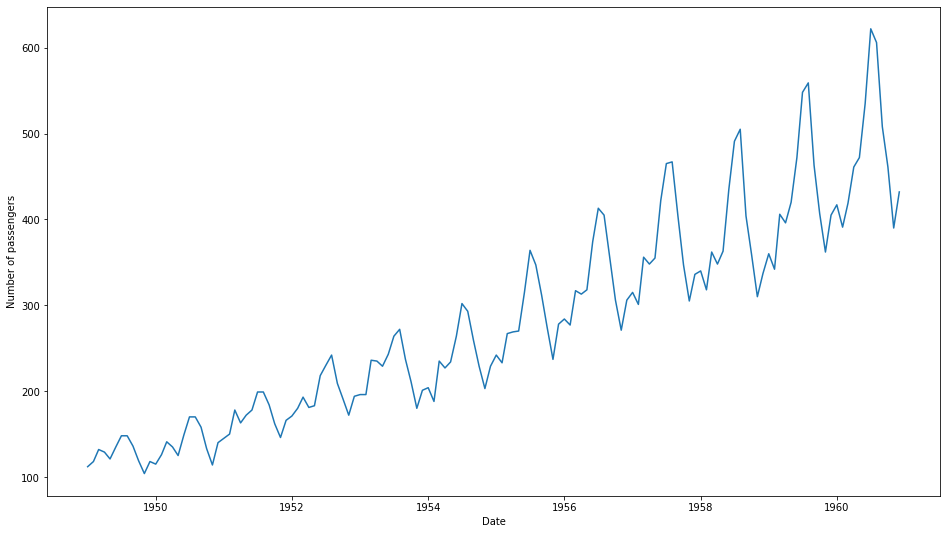

In [20]:
series = pd.read_csv(r"C:\Users\insapab\Desktop\Python\Projects\TimeSeriesForeCastingUsingARIIMA\datasets_1057_1913_AirPassengers.csv", header=0, index_col=0,
parse_dates=True, squeeze=True)
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.plot(series)
series.head()

Statsmodel library provides us with the naive or the classical method of decomposition. There are other advanced decomposition methods like Seasonal and Trend decomposition using Loess or STL decomposition. We can see that trend varies with the level of the time-series, so we will be using the multiplicative time-series. 

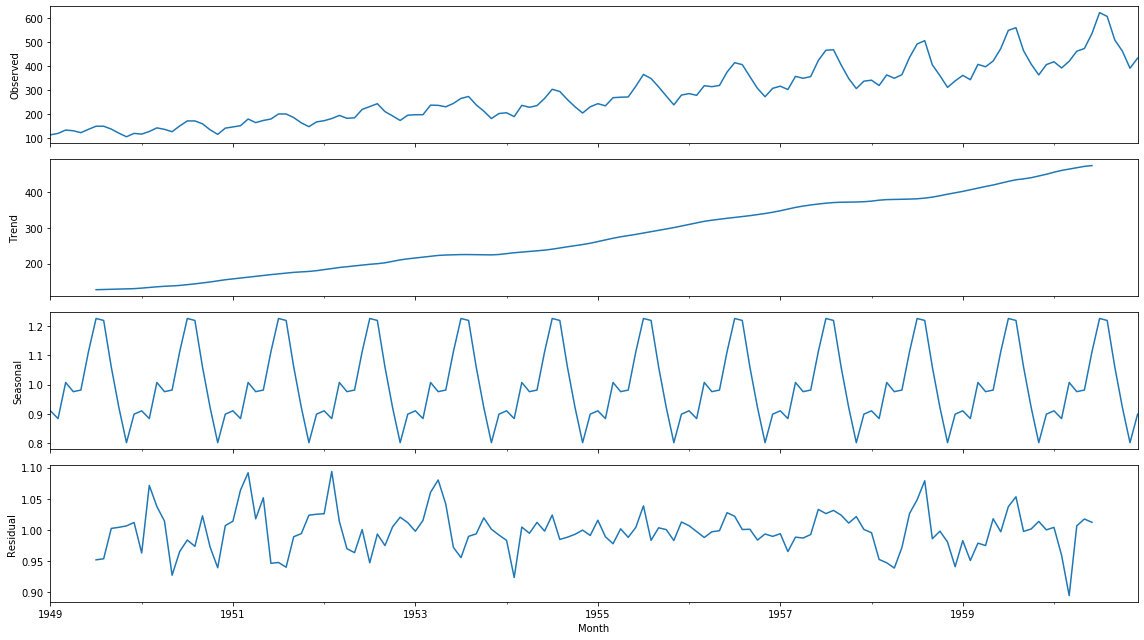

In [21]:
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

We can clearly see the trend and seasonality in the data. There is also residual or noise in the data which we will further attempt to resolve. 

### Removing the trend and seasonality

According to the book, Introductory time-series with R, trend has been defined as **a systematic change in a time series that does not appear to be periodic is known as a trend.** The trends can be of different types:

**Based on locality of time-series:**

1. Global Trends: These are trends that apply to the whole time series.

2. Local Trends: These are trends that apply to parts or subsequences of a time series.

**Based on the nature of time-series:**

1. Deterministic Trends: These are trends that consistently increase or decrease.

2. Stochastic Trends: These are trends that increase and decrease inconsistently.

Perhaps the simplest method to detrend a time series is by **differencing**. Speciffically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

value(t) = observation(t) - observation(t - 1)

This has the effect of removing a trend from a time series dataset.

### Power tranforms

Alongwith differencing, a number of power transforms can be used to remove trends, seasonality and noise. There are a number of transforms avaiable and I will be listing some of the popular ones down below:

1. Square transform 
2. Log transform
3. Square root transform 
4. Box Cox transform

#### Q1. Explain, in detail, the above transform methods. 

I am going to use power tranform on the air passenger dataset and then differencing to remove the trend and seasonality. The trend graph seems to be parabolic in nature which means it can either be removed by taking a square root or by log tramsform. Let us try both and look at the outcomes. 

In [5]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    roll_mean = ts.rolling(window=12).mean()
    movingstd = ts.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(movingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

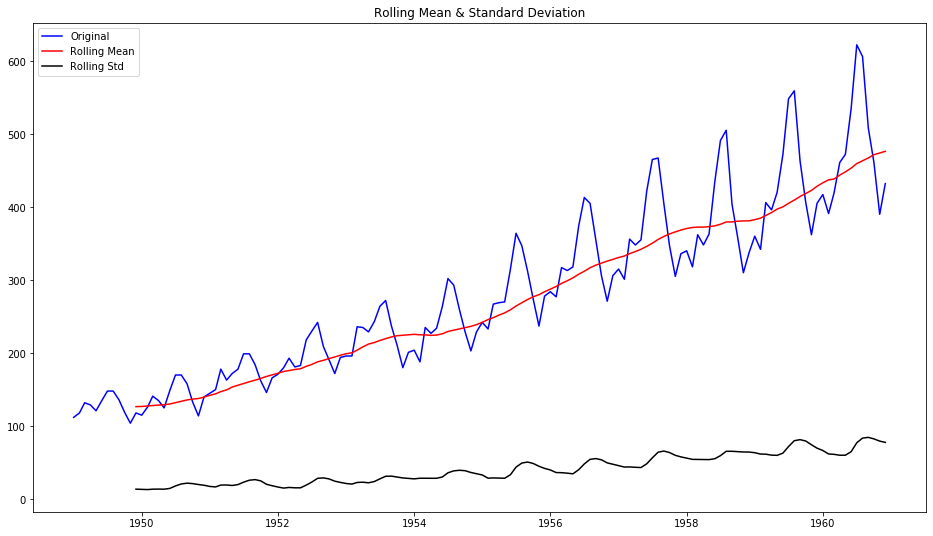

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [6]:
stationarity_check(series)

This step is taken from the last week and all the explanations were provided before. We can only reject null hypothesis when the test statistics is small in a negative number, less than the critical value and p-value is less than 0.05. Only then we can reject our null hypothesis that the series is non-stationary and assume that our time-series is stationary. 

I am going to start by performing log transform on the data. 

In [7]:
log_series = np.log(series)
log_series.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

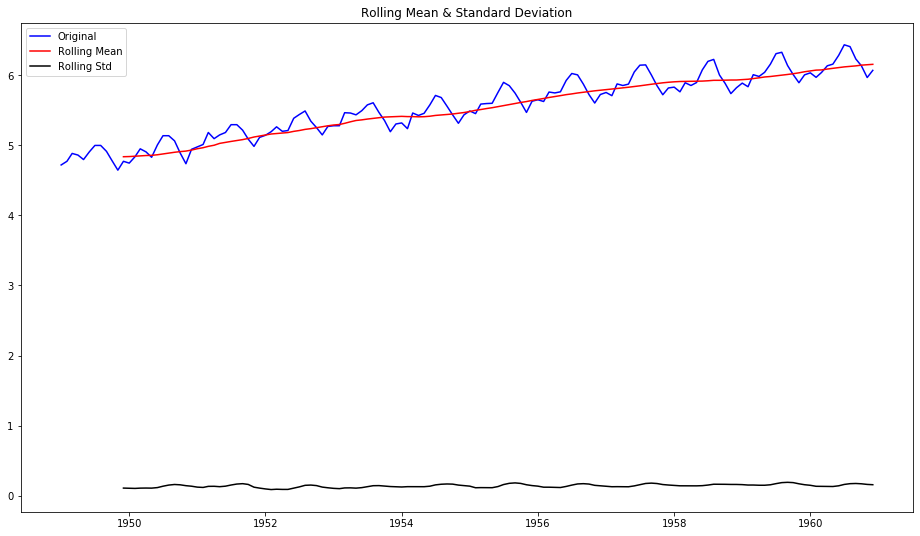

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [8]:
stationarity_check(log_series)

Let us also see how differencing performs:

In [9]:
series_diff = series.diff()
series_diff = series_diff.dropna()

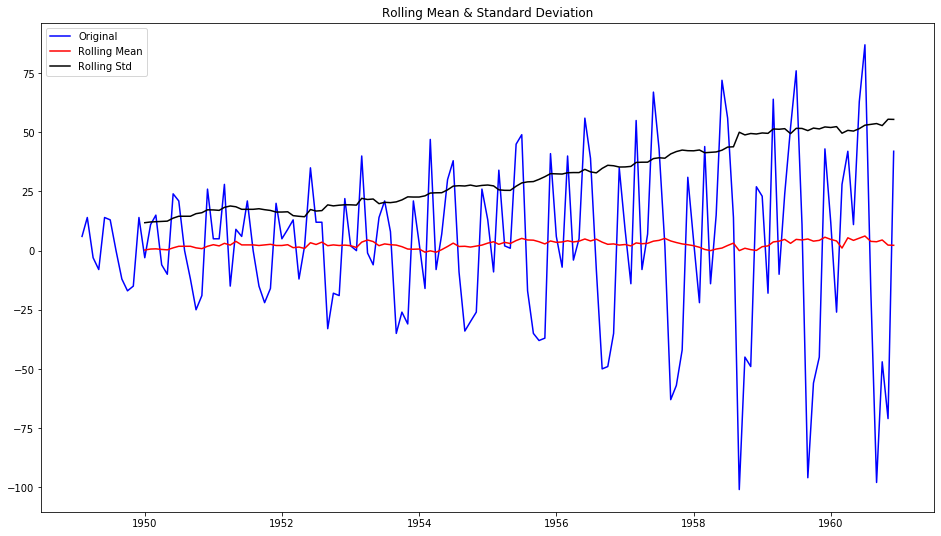

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [10]:
stationarity_check(series_diff)

Now we will perform differencing on the log transformed data to see how well it performs:

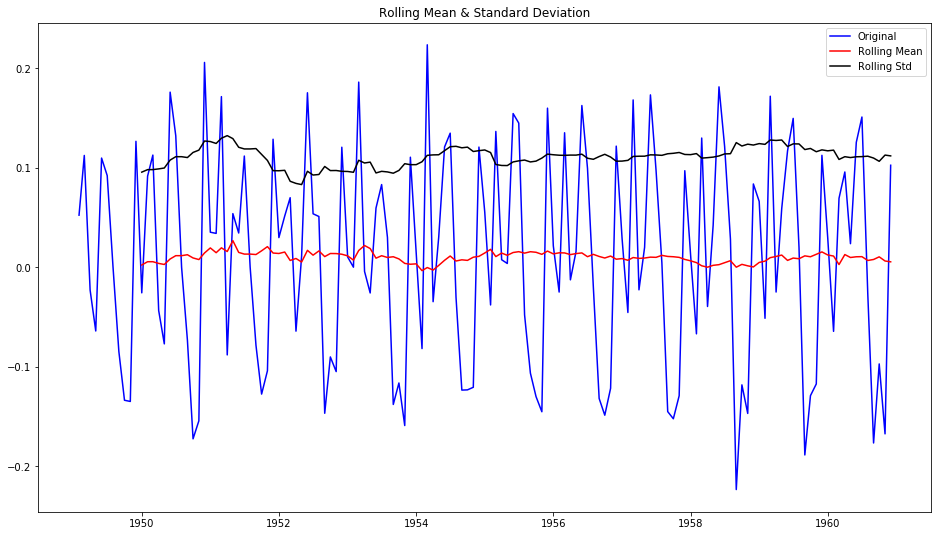

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [11]:
log_series_diff = log_series.diff()
log_series_diff = log_series_diff.dropna()
stationarity_check(log_series_diff)

The test static is below than the last transform and the p value is approx 0.07. We can also try square root transform to see if it makes our data any better

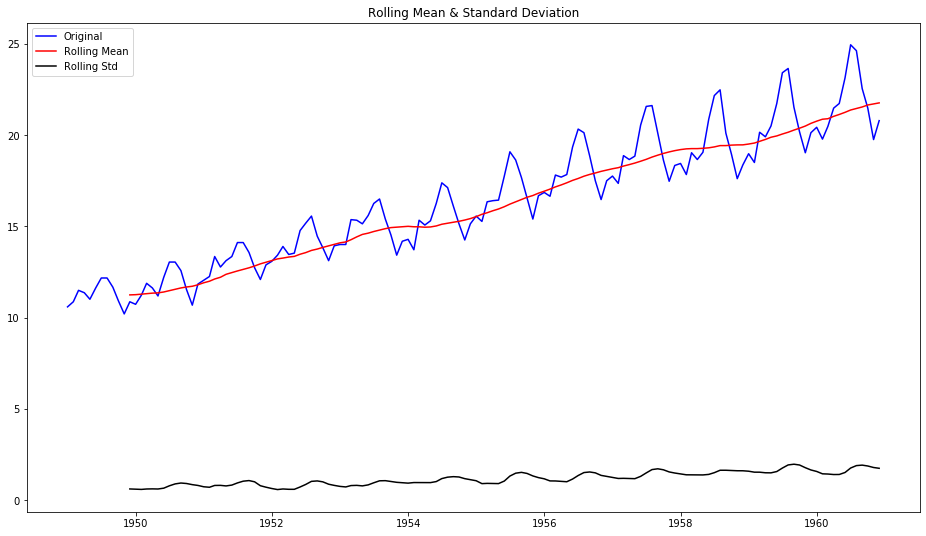

Results of Dickey-Fuller Test:
Test Statistic                  -0.345854
p-value                          0.918754
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [12]:
sqrt_series = np.sqrt(series)
stationarity_check(sqrt_series)

The results are not very encouraging so we will stick the log series with differencing.

#### Q2: Perform similar transformations to the temperature dataset. 

But before you perform the transformations, split the dataset into test and train by:

datetime
2001-01-01 00:30:00    14.0
2001-01-01 01:30:00    13.0
2001-01-01 02:30:00    13.0
2001-01-01 03:30:00    13.0
2001-01-01 04:30:00    13.0
Name: Temperature, dtype: float64

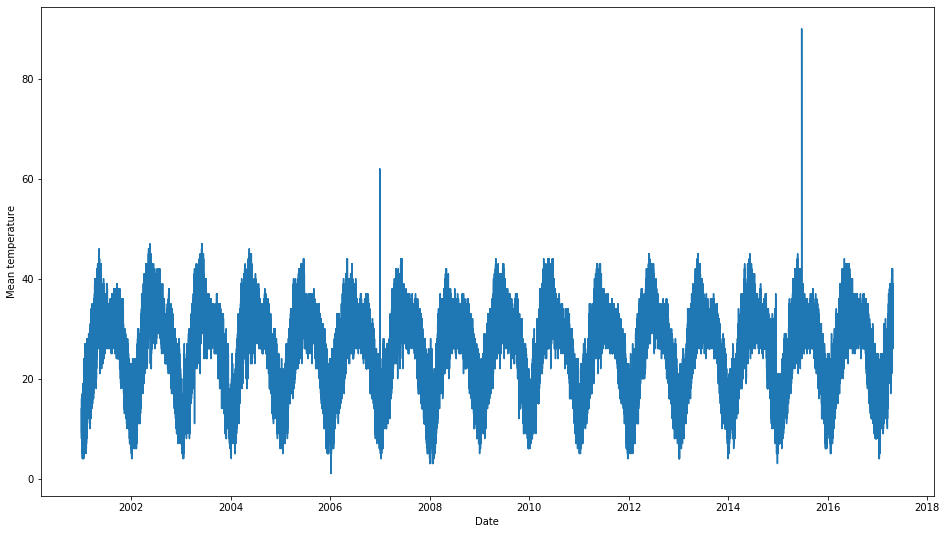

In [29]:
series = pd.read_csv(r"C:\Users\insapab\Desktop\Python\Projects\TimeSeriesForeCastingUsingARIIMA\testset_corrected.csv", header=0, index_col=0,
parse_dates=True, squeeze=True)
plt.xlabel('Date')
plt.ylabel('Mean temperature')
plt.plot(series)
series.head()

In [ ]:
train = series[:'2015']
test = series['2016':]

## Analysing train data

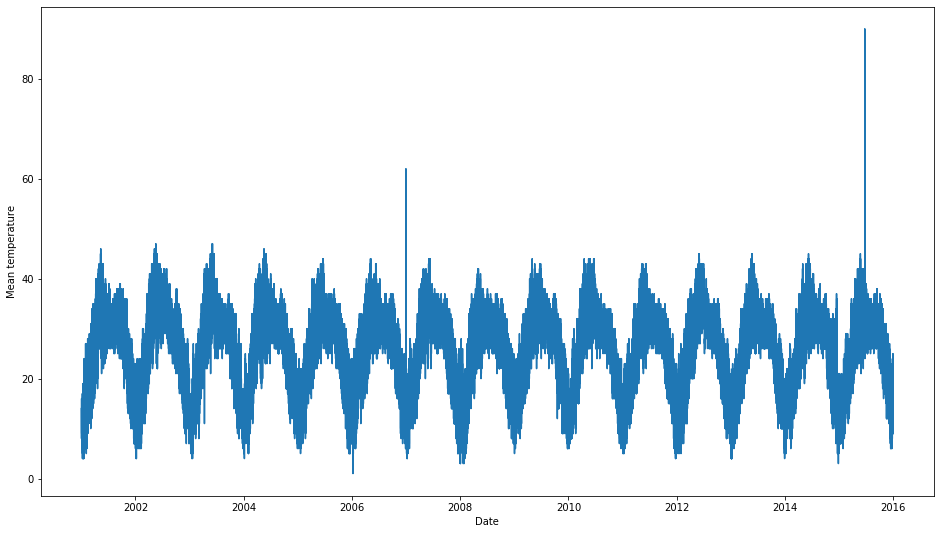

In [63]:
plt.xlabel('Date')
plt.ylabel('Mean temperature')
plt.plot(train)

#### Observation on data from previous assignment
* given data doesn't posses trend, seasonality in it.
* we can write, 
               data = Level + randomness
                         (or)
               data = Level * randomness 
* We can't judge that data consists of additive or multplicative decomposition just by observation

#### Let us consider additive decomposition of data

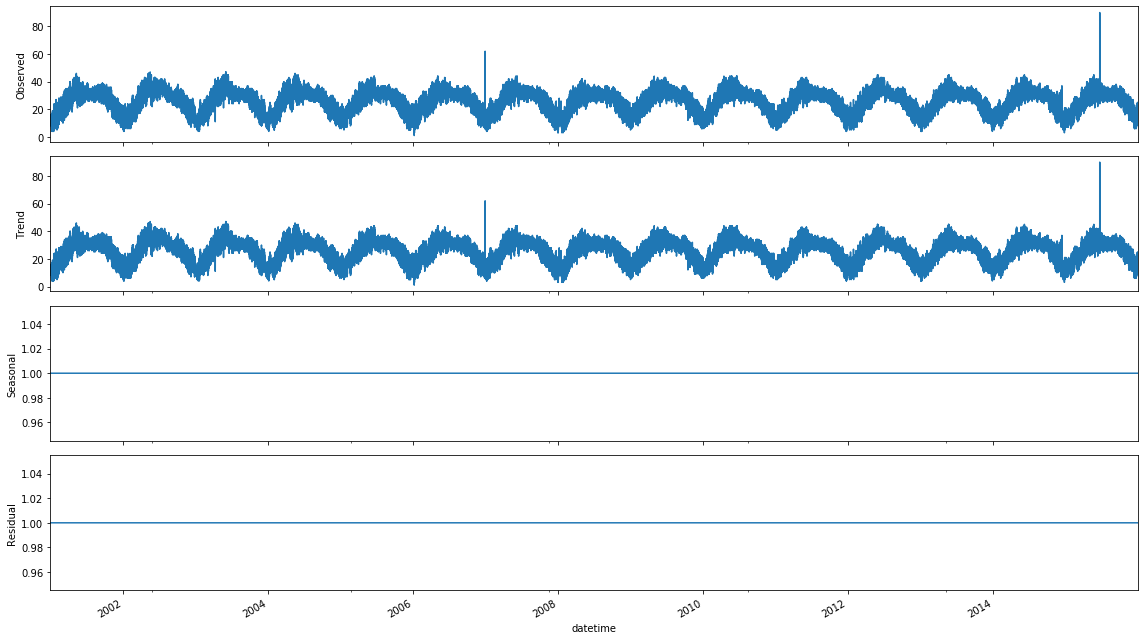

In [42]:
result = seasonal_decompose(train, model='additive', freq = 1)
result.plot()
plt.show()

* entire data is considered as trend and no randomness (residual) component shown in this method

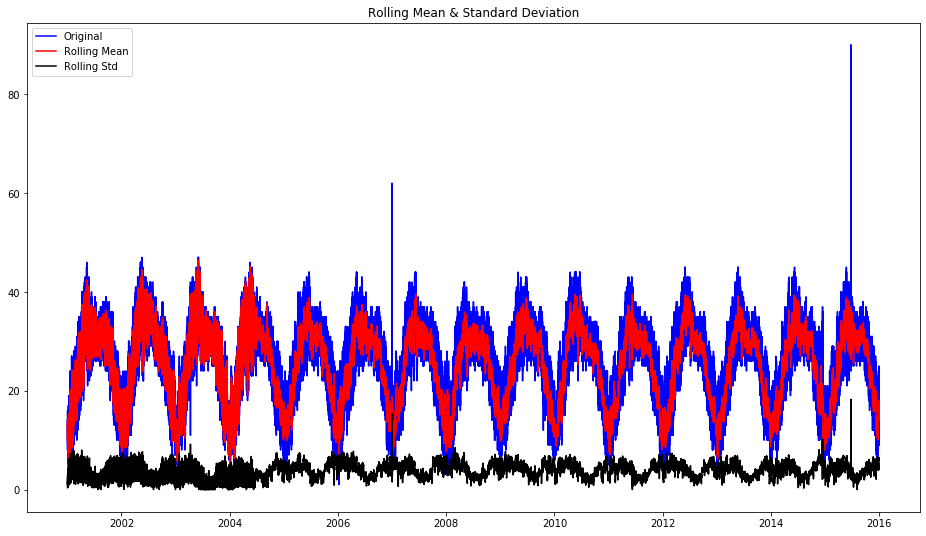

Results of Dickey-Fuller Test:
Test Statistic                -6.298830e+00
p-value                        3.452199e-08
#Lags Used                     6.200000e+01
Number of Observations Used    6.938200e+04
Critical Value (1%)           -3.430444e+00
Critical Value (5%)           -2.861582e+00
Critical Value (10%)          -2.566792e+00
dtype: float64


In [35]:
stationarity_check(train)

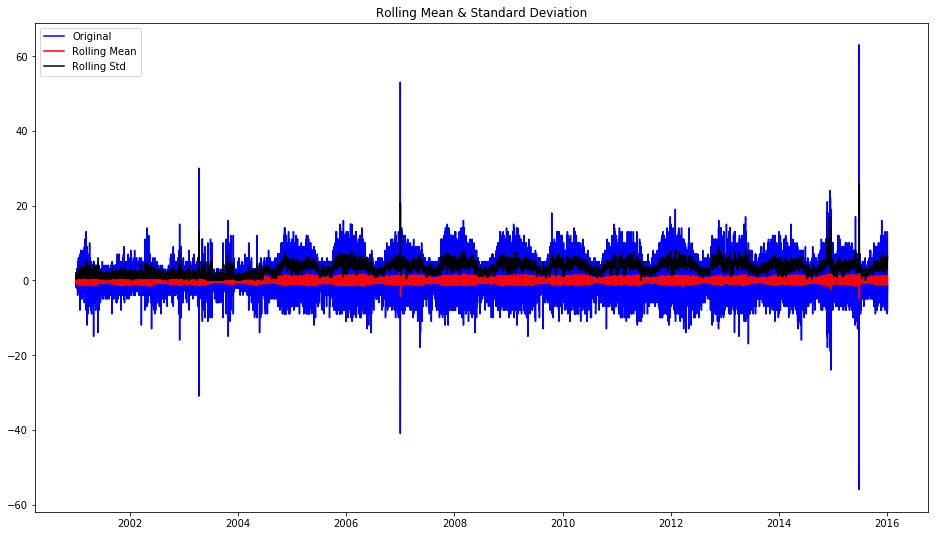

Results of Dickey-Fuller Test:
Test Statistic                   -39.211371
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    69382.000000
Critical Value (1%)               -3.430444
Critical Value (5%)               -2.861582
Critical Value (10%)              -2.566792
dtype: float64


In [38]:
series_diff = train.diff()
series_diff = series_diff.dropna()
stationarity_check(series_diff)

* As we can see moving average and moving standard deviation are constant.
* 'p' value and 'test statistics' value are way better than ADF on original data.

#### Let us consider multiplicative decomposition of data

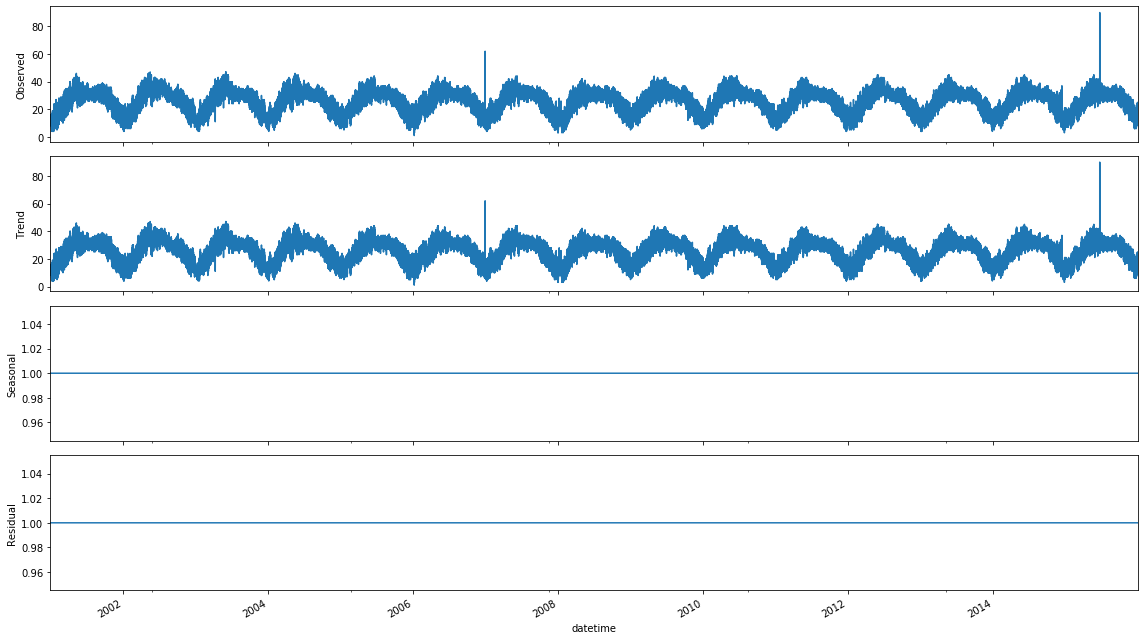

In [45]:
result = seasonal_decompose(train, model='multiplicative', freq = 1)
result.plot()
plt.show()

* Here also, entire data is considered as trend and no randomness (residual) component shown in this method

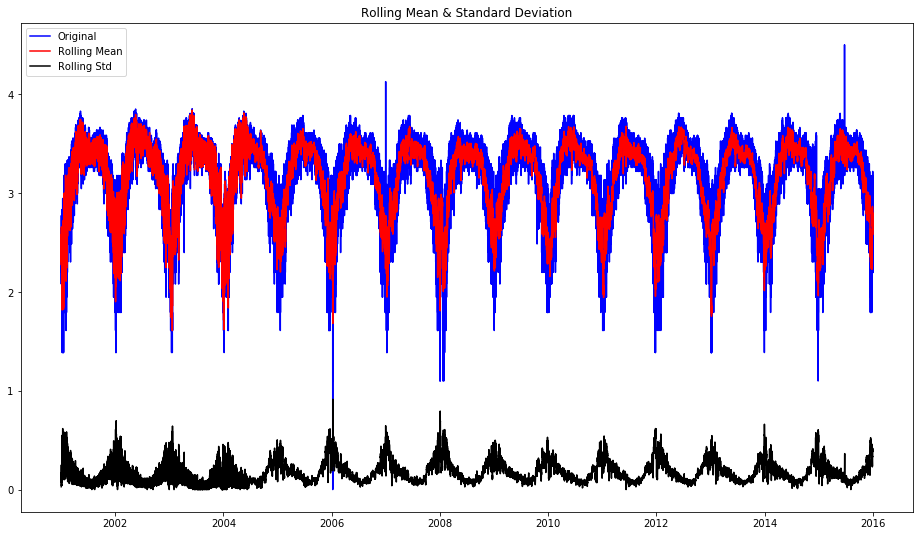

Results of Dickey-Fuller Test:
Test Statistic                -6.678826e+00
p-value                        4.394865e-09
#Lags Used                     6.200000e+01
Number of Observations Used    6.938200e+04
Critical Value (1%)           -3.430444e+00
Critical Value (5%)           -2.861582e+00
Critical Value (10%)          -2.566792e+00
dtype: float64


In [39]:
log_series = np.log(train)
stationarity_check(log_series)

* As we can see moving average and moving standard deviation are oscilating.
* 'p' value and 'test statistics' value are similar as ADF on original data and not encouraging.

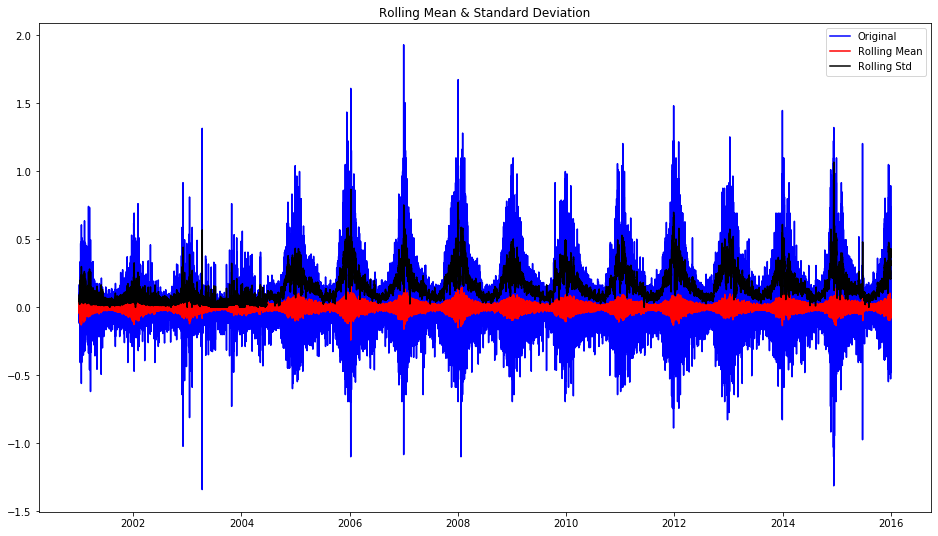

Results of Dickey-Fuller Test:
Test Statistic                   -38.283586
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    69382.000000
Critical Value (1%)               -3.430444
Critical Value (5%)               -2.861582
Critical Value (10%)              -2.566792
dtype: float64


In [47]:
log_series_diff = log_series.diff()
log_series_diff = log_series_diff.dropna()
stationarity_check(log_series_diff)

* As we can see constant moving average and oscillating moving standard deviation.
* 'p' value and 'test statistics' value are way better than ADF on original data.

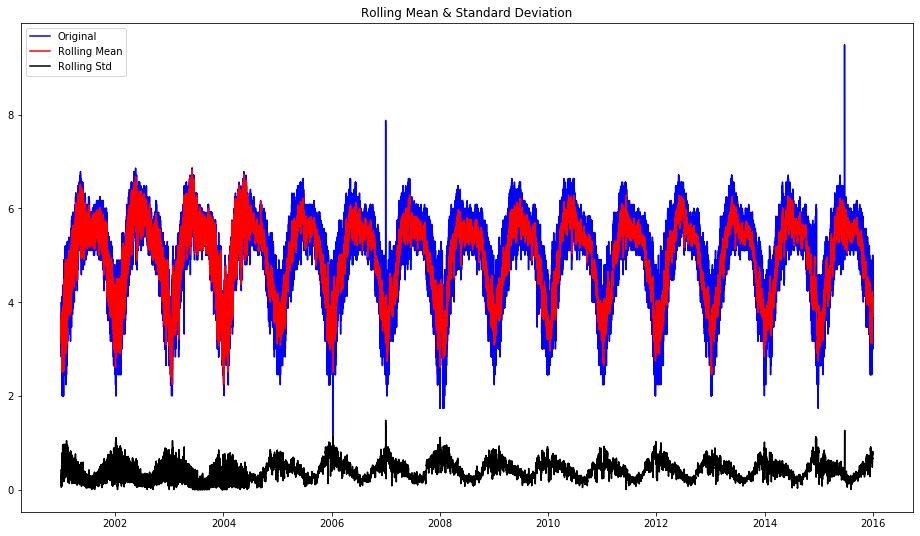

Results of Dickey-Fuller Test:
Test Statistic                -6.320209e+00
p-value                        3.079396e-08
#Lags Used                     6.200000e+01
Number of Observations Used    6.938200e+04
Critical Value (1%)           -3.430444e+00
Critical Value (5%)           -2.861582e+00
Critical Value (10%)          -2.566792e+00
dtype: float64


In [41]:
sqrt_series = np.sqrt(train)
stationarity_check(sqrt_series)

* As we can see moving average and moving standard deviation are oscilating.
* 'p' value and 'test statistics' value are similar as ADF on original data and not encouraging.

#### Observation on decomposition of train data
* Of all transforms, series diff transform is showing best p and test statistics value.
* So the train data is additive decompostion of level and randomness
            train data  = Level + randomness

## Analysing test data

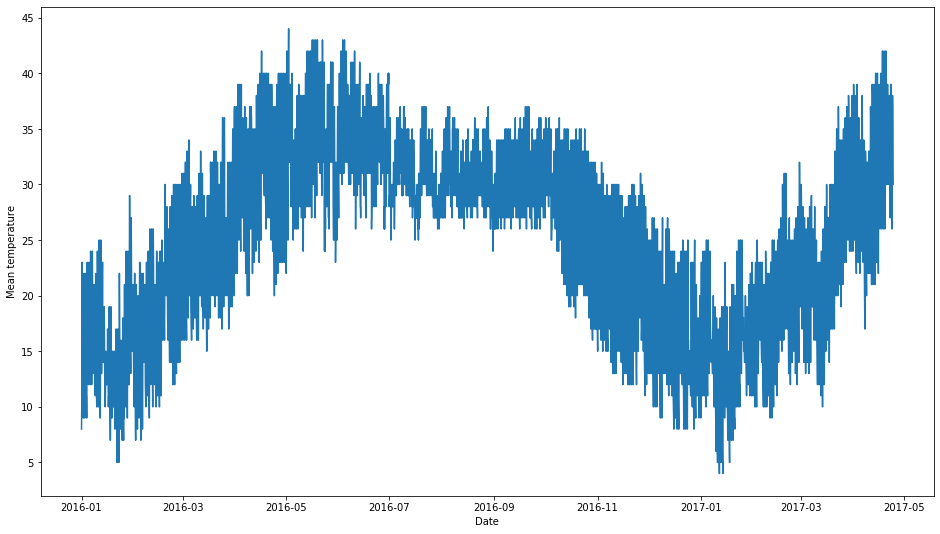

In [52]:
plt.xlabel('Date')
plt.ylabel('Mean temperature')
plt.plot(test)

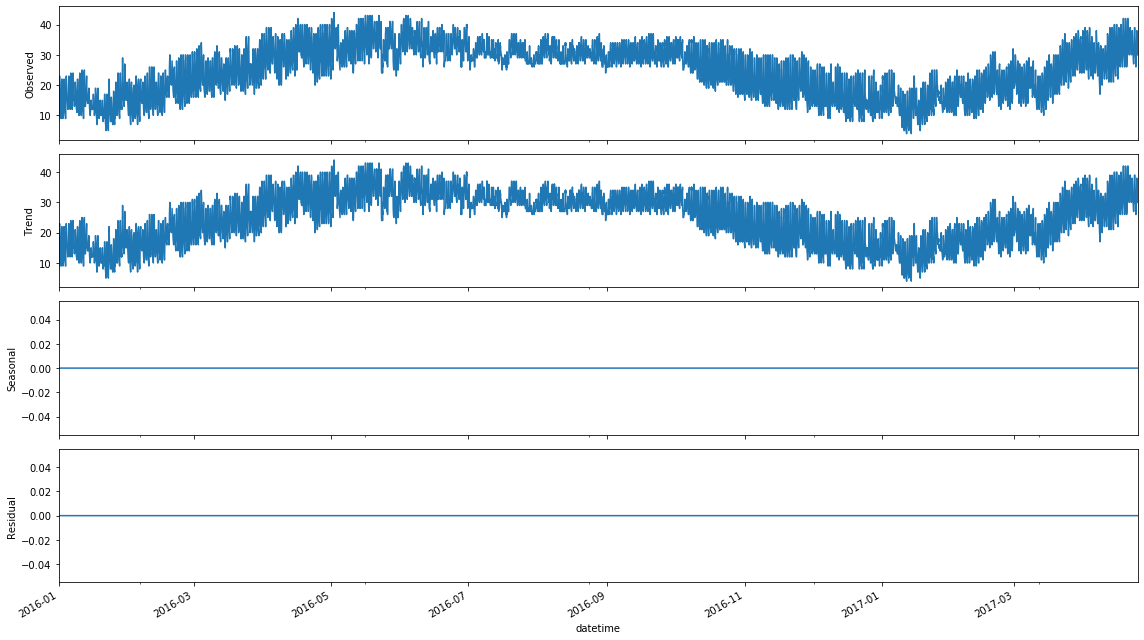

In [54]:
result = seasonal_decompose(test, model='additive', freq = 1)
result.plot()
plt.show()

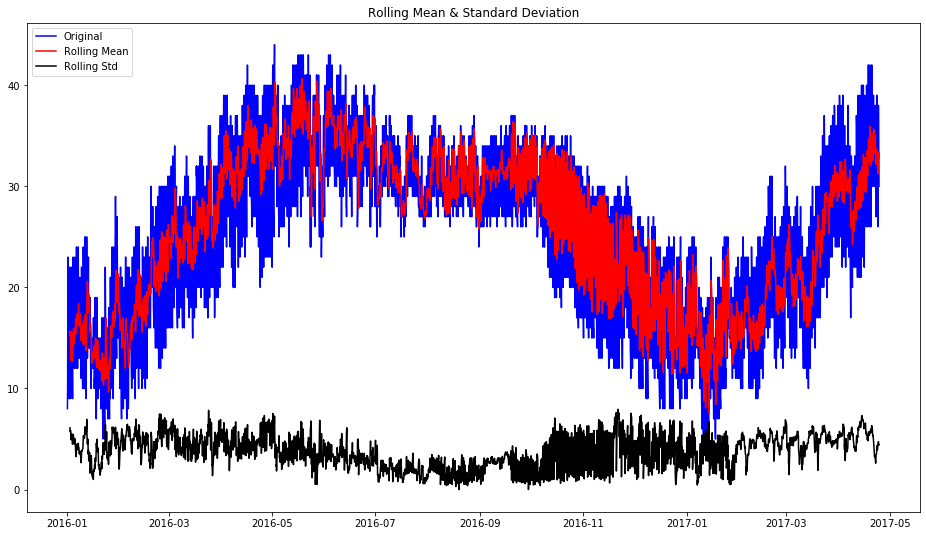

Results of Dickey-Fuller Test:
Test Statistic                   -2.668827
p-value                           0.079590
#Lags Used                       36.000000
Number of Observations Used    7992.000000
Critical Value (1%)              -3.431168
Critical Value (5%)              -2.861902
Critical Value (10%)             -2.566963
dtype: float64


In [55]:
stationarity_check(test)

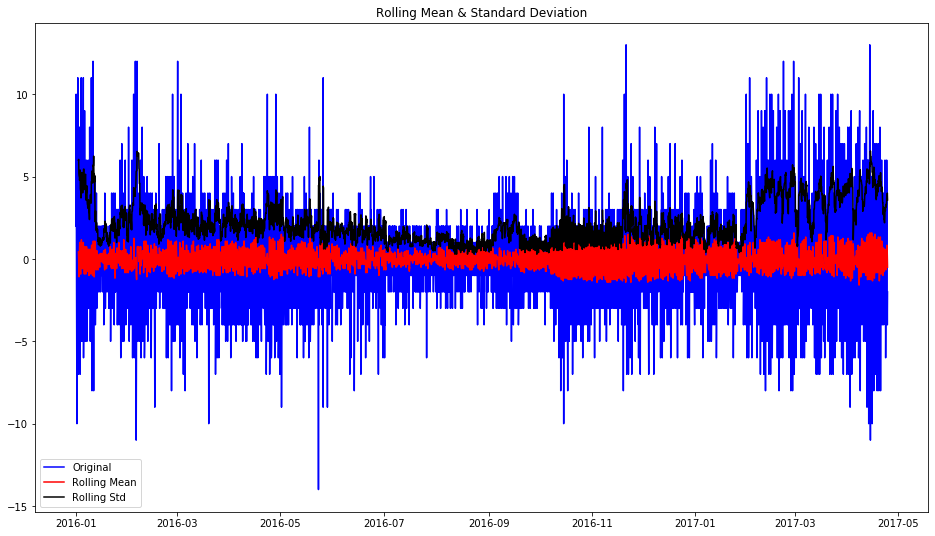

Results of Dickey-Fuller Test:
Test Statistic                  -21.058081
p-value                           0.000000
#Lags Used                       35.000000
Number of Observations Used    7992.000000
Critical Value (1%)              -3.431168
Critical Value (5%)              -2.861902
Critical Value (10%)             -2.566963
dtype: float64


In [56]:
series_diff = test.diff()
series_diff = series_diff.dropna()
stationarity_check(series_diff)

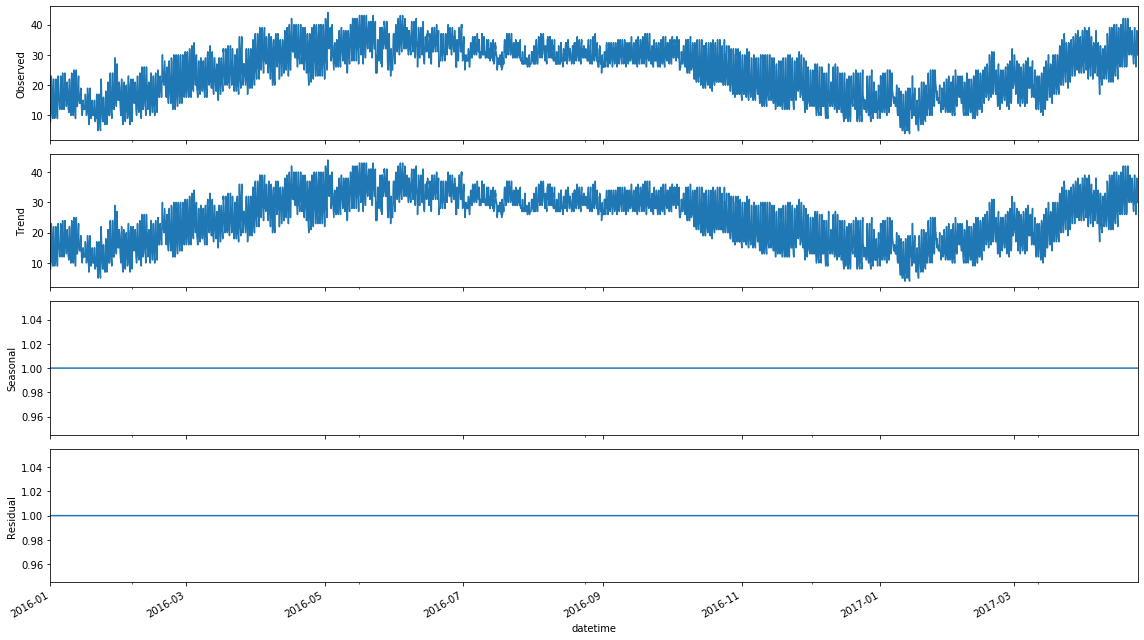

In [57]:
result = seasonal_decompose(test, model='multiplicative', freq = 1)
result.plot()
plt.show()

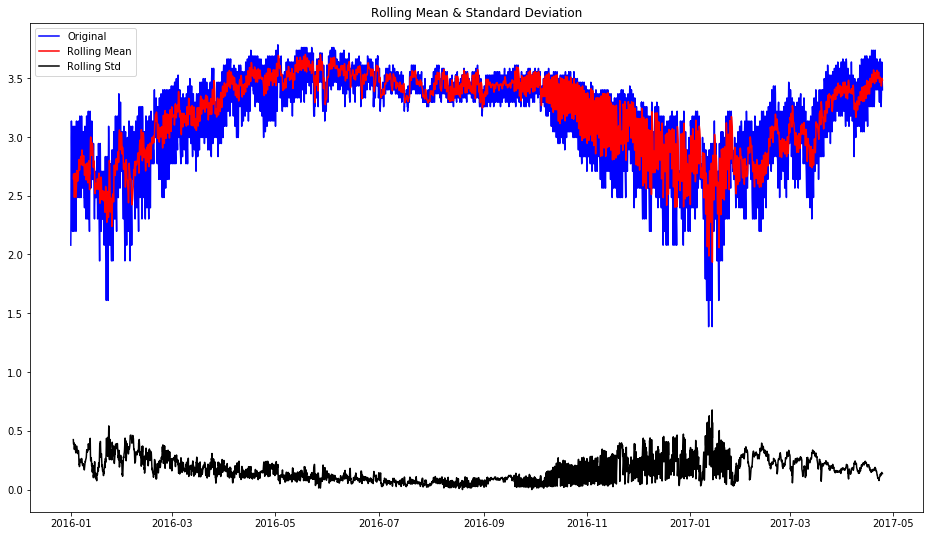

Results of Dickey-Fuller Test:
Test Statistic                   -2.660232
p-value                           0.081176
#Lags Used                       33.000000
Number of Observations Used    7995.000000
Critical Value (1%)              -3.431168
Critical Value (5%)              -2.861902
Critical Value (10%)             -2.566962
dtype: float64


In [58]:
log_series = np.log(test)
stationarity_check(log_series)

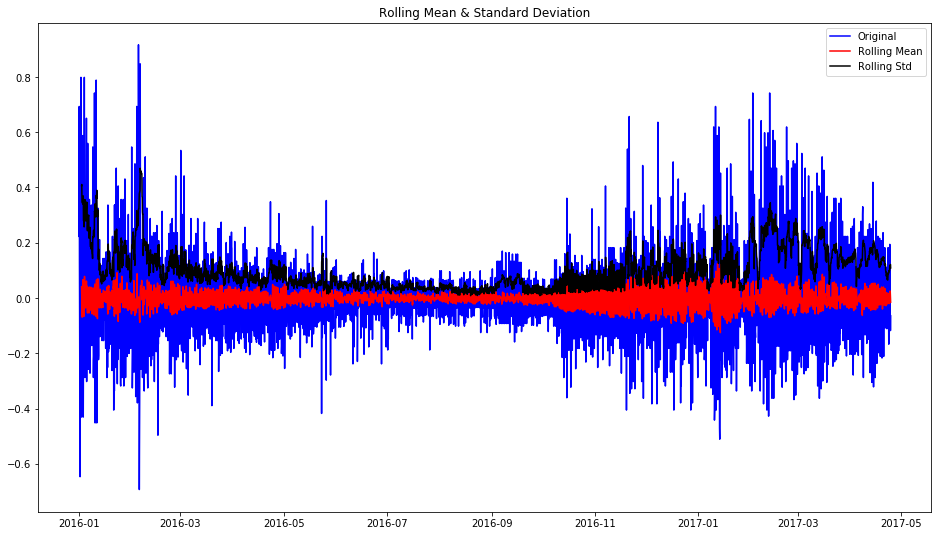

Results of Dickey-Fuller Test:
Test Statistic                  -25.027506
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    7995.000000
Critical Value (1%)              -3.431168
Critical Value (5%)              -2.861902
Critical Value (10%)             -2.566962
dtype: float64


In [59]:
log_series_diff = log_series.diff()
log_series_diff = log_series_diff.dropna()
stationarity_check(log_series_diff)

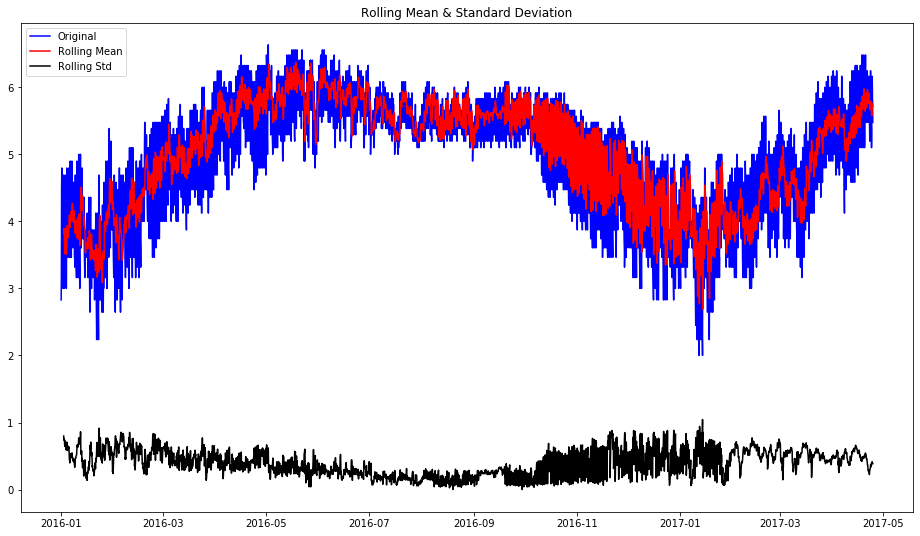

Results of Dickey-Fuller Test:
Test Statistic                   -2.513513
p-value                           0.112221
#Lags Used                       33.000000
Number of Observations Used    7995.000000
Critical Value (1%)              -3.431168
Critical Value (5%)              -2.861902
Critical Value (10%)             -2.566962
dtype: float64


In [60]:
sqrt_series = np.sqrt(test)
stationarity_check(sqrt_series)

#### Observation on decomposition of test data
* Of all transforms, logseries diff transform is showing best p and test statistics value.
* So the test data is  multiplicative decompostion of level and randomness
            test data  = Level * randomness

#### Q1. Explain, in detail, the above transform methods.

* Square transform (TS^2): It linearizes the sqaure root trend in data
* Log transform log(TS): It linearizes exponential growth in seasonality or trend in data. 
* Square root transform sqrt(TS): It linearizes the qudratic trend in data
* Box Cox transform : It is way to transform non-normal distributed data into a normal distributed data.
    
        for positve values of time series data(y):
            y(L) = (y^(L) -1)/L  if L =! 0 
                     =  log(y)     if L = 0
        for negative values of time series data(y):
            y(L) = ((y+L2)^(L1) -1)/L1  if L1 =! 0 
                 = log(y+L2)            if L1 = 0
        The exponent L, L1 and L2 values ranges between -5 to 5 

     Need to experiment with this exponents until we reach best normal distribution of the data.
       


This is all for week 3, week 4 is the last in this series and we will be making the predictions from our time-series. See you next week!